In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [2]:
Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(Url)
titanic.columns=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Refining the necessary columns

In [4]:
titanic = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


### Data Cleaning

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [6]:
titanic.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [7]:
titanic.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [8]:
print(titanic['Sex'].unique())
print(titanic['Survived'].unique())

['male' 'female']
[0 1]


In [9]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean()).astype(int)
titanic['Sex'] = titanic['Sex'].map({'male': 1, 'female': 0})
titanic.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.544332,0.523008,0.381594,32.204208,0.383838
std,0.836071,0.477990,13.013778,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int32  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(1), int32(1), int64(5)
memory usage: 45.4 KB


### Learning

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [12]:
X = titanic.drop(columns = 'Survived')
y = titanic['Survived']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=355)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, pred))
confusion_matrix(y_test, pred)

0.7574626865671642


array([[134,  37],
       [ 28,  69]], dtype=int64)

[Text(339.0136525916784, 530.01, 'X[1] <= -0.3\ngini = 0.477\nsamples = 623\nvalue = [378, 245]'),
 Text(142.84485190409026, 502.83000000000004, 'X[0] <= 0.24\ngini = 0.373\nsamples = 222\nvalue = [55, 167]'),
 Text(78.70239774330042, 475.65000000000003, 'X[2] <= -2.092\ngini = 0.133\nsamples = 126\nvalue = [9, 117]'),
 Text(62.96191819464034, 448.47, 'X[0] <= -0.96\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(56.665726375176305, 421.29, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(69.25811001410437, 421.29, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(94.44287729196051, 448.47, 'X[5] <= -0.079\ngini = 0.121\nsamples = 124\nvalue = [8, 116]'),
 Text(81.85049365303244, 421.29, 'X[5] <= -0.091\ngini = 0.241\nsamples = 50\nvalue = [7, 43]'),
 Text(75.5543018335684, 394.11, 'X[2] <= 1.941\ngini = 0.215\nsamples = 49\nvalue = [6, 43]'),
 Text(56.665726375176305, 366.93000000000006, 'X[3] <= 0.002\ngini = 0.19\nsamples = 47\nvalue = [5, 42]'),
 Text(37.7771509167842, 339.75, '

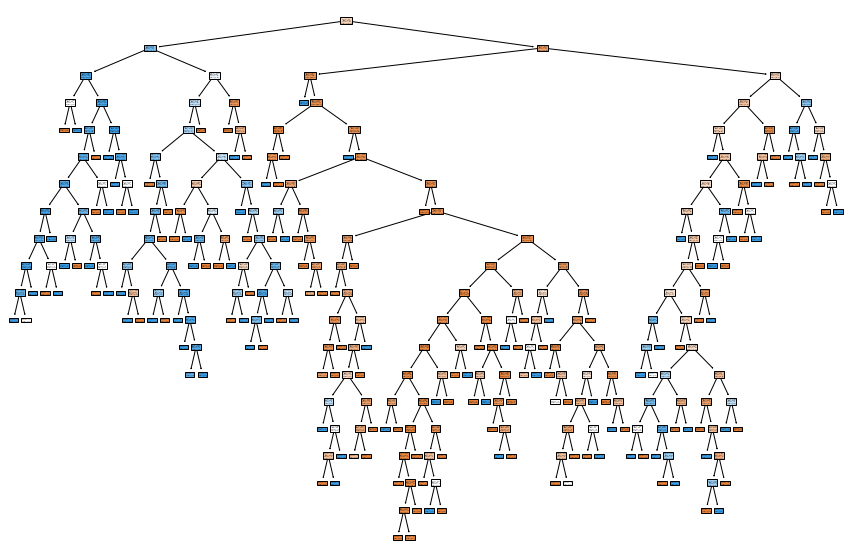

In [15]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

### Tuning Hyper parameter

In [16]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [17]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [18]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [19]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}
0.820232258064516


In [24]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =7, min_samples_leaf= 1, min_samples_split= 4, splitter ='random')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=4,
                       splitter='random')

In [26]:
pred=clf.predict(X_test)
print(accuracy_score(y_test, pred))
confusion_matrix(y_test, pred)

0.7798507462686567


array([[150,  21],
       [ 38,  59]], dtype=int64)